In [14]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from Plate import Plate
from PlateDetector import PlateDetector
%matplotlib inline
np.set_printoptions(suppress=True)

In [15]:
ROOT = os.path.abspath("..")

PATHS = {
    "data": os.path.join(ROOT, "data"),
    "models": os.path.join(ROOT, "models"),
}

DATA = {
    "img00" : os.path.join(PATHS["data"], "car00.webp"),
    "img01" : os.path.join(PATHS["data"], "car01.webp"),
    "img02" : os.path.join(PATHS["data"], "car02.jpg"),
    "img03" : os.path.join(PATHS["data"], "car03.jpg"),
    "img04" : os.path.join(PATHS["data"], "car04.jpg"),
    "img05" : os.path.join(PATHS["data"], "car05.jpg"),
    "video" : os.path.join(PATHS["data"], "video.mp4"),
}

MODEL_PATH = os.path.join(PATHS["models"], "plates_yolov5n.onnx")
READER_PATH = os.path.join(PATHS["models"], "plate_reader.pt")

In [16]:
model = PlateDetector(MODEL_PATH, 640)
reader = torch.hub.load('ultralytics/yolov5', 'custom', path=READER_PATH)

c:\Users\iperkins\Develop\LicensePlateReader\.venv\lib\site-packages\torch\hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\iperkins/.cache\torch\hub\master.zip
YOLOv5  2023-7-20 Python-3.10.11 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1806520 parameters, 0 gradients, 4.3 GFLOPs
Adding AutoShape... 


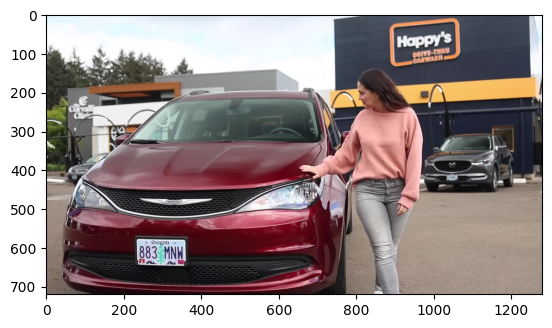

In [10]:
img = cv2.imread(DATA["img05"])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [11]:
img_height, img_width = img.shape[:2]
model.set_image_size(img_width, img_height)
plates = model.predict(img)
plates.shape

(2,)